In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("D:\DS Course\Scripts\proyecto_int_1\proyecto_int_1\games.csv")
df.columns = df.columns.str.lower() #Se pasan los nombres de las columnas a minusculas
df['year_of_release'] = df['year_of_release'].astype('Int64') #Paso year_of_release a int64
df['user_score'] = df['user_score'].replace("tbd", np.nan) #paso los valores tbd a NaN para conservas la columna como un float64
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df[['critic_score', 'rating']] = df[['critic_score', 'rating']].replace("", np.nan)#Hago los valores en blanco a NaN para las columnas critics_score y rating

df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1) #sumo los todas las ventas en una nueva columna



<>:3: SyntaxWarning: invalid escape sequence '\D'
<>:3: SyntaxWarning: invalid escape sequence '\D'
C:\Users\david\AppData\Local\Temp\ipykernel_3236\479267899.py:3: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DS Course\Scripts\proyecto_int_1\proyecto_int_1\games.csv")


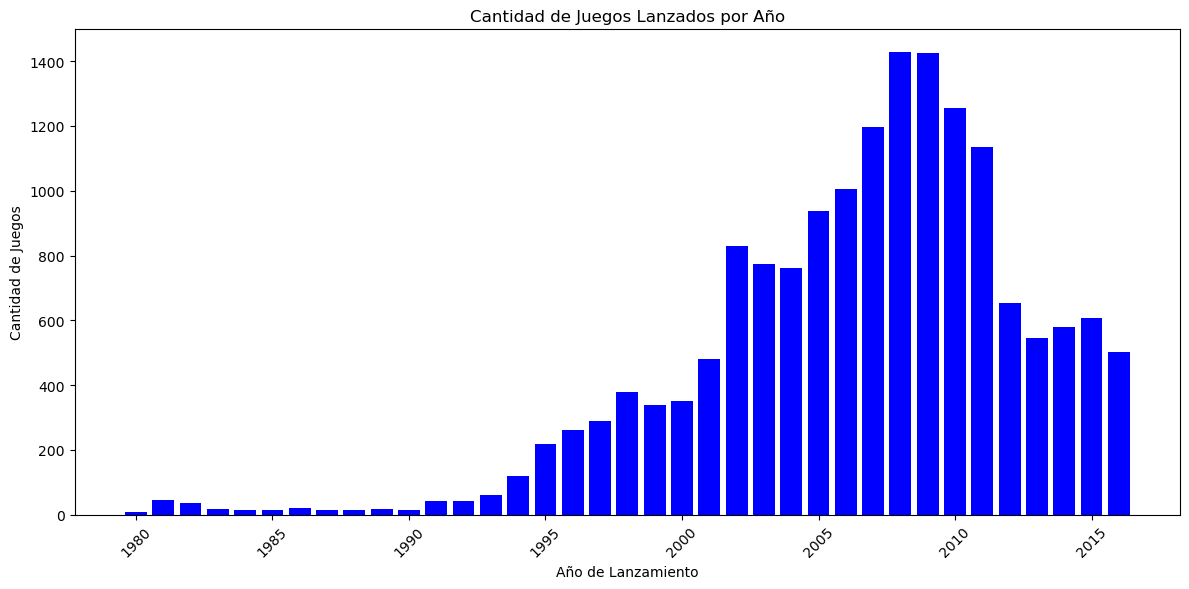

De acuerdo a los datos, el periodo sì ha influido en la cantidad de juegos lanzados. De 1995 a 2011 hubo un incremento exponencial en lanzamientos. 


In [6]:
games_per_year = df.groupby('year_of_release').size().reset_index(name='game_count')
import matplotlib.pyplot as plt

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(games_per_year['year_of_release'], games_per_year['game_count'], color='blue')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Juegos')
plt.title('Cantidad de Juegos Lanzados por Año')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("De acuerdo a los datos, el periodo sì ha influido en la cantidad de juegos lanzados. De 1995 a 2011 hubo un incremento exponencial en lanzamientos. ")

<Figure size 1400x800 with 0 Axes>

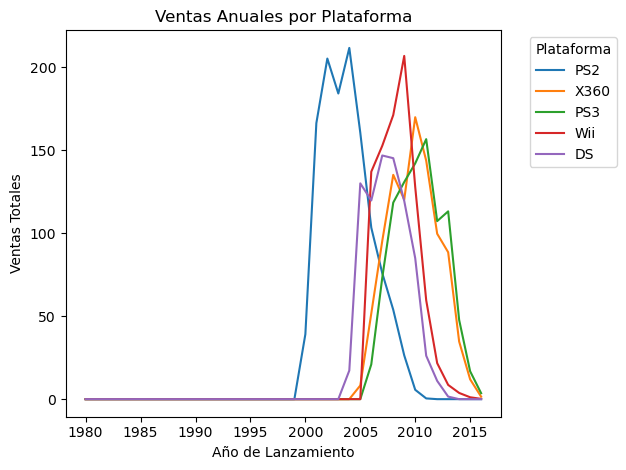

Este grafico muestra las ventas a lo larco de los años por plataforma


In [ ]:
platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales['total_sales'] = platform_sales.sum(axis=1)
top_platforms = platform_sales.sort_values('total_sales', ascending=False)
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
sales_by_year_platform = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
                                          
plt.figure(figsize=(14, 8))
sales_by_year_platform[top_platforms.index[:5]].plot(kind='line')
plt.title('Ventas Anuales por Plataforma')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales')
plt.legend(title='Plataforma', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show(

    )           
print("Este grafico muestra las ventas a lo largo de los años de las plataformas con mayores ventas")                        

In [10]:
platforms_no_sales_recent = sales_by_year_platform.loc[sales_by_year_platform.index[-5]:].sum(axis=0)
platforms_no_sales_recent = platforms_no_sales_recent[platforms_no_sales_recent == 0].index.tolist()
print("Plataformas que solían ser populares pero no tienen ventas recientes:")
print(platforms_no_sales_recent)

Plataformas que solían ser populares pero no tienen ventas recientes:
['2600', '3DO', 'DC', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PCFX', 'PS', 'PS2', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'XB']


In [11]:
platform_lifetimes = df.groupby('platform')['year_of_release'].agg(['min', 'max']).reset_index()
platform_lifetimes['lifespan'] = platform_lifetimes['max'] - platform_lifetimes['min']
average_lifespan = platform_lifetimes['lifespan'].mean()

print(f"Tiempo promedio de vida de las plataformas: {average_lifespan:.2f} años")


Tiempo promedio de vida de las plataformas: 7.61 años


### Considerando que el tiempo de vida estimado de una plataforma, para hacer la proyección de datos para 2017, utilizaremos datos de 8 años en adelante, es decir 2008.
- No se utilizò 2015 ya que al parecer no tenía los datos del año completo, por lo que no habìa crecimeinto en el ùltimo año del DF 

In [22]:
df_new = df[(df['year_of_release'] >= 2009) & (df['year_of_release'] <= 2014)]
platform_sales_new = df_new.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
platform_sales_new['total_sales'] = platform_sales_new.sum(axis=1)
top_platforms_new = platform_sales_new.sort_values('total_sales', ascending=False)

print("Plataformas líderes en ventas:")
print(top_platforms_new)

Plataformas líderes en ventas:
          na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
PS3         286.24    247.70     63.32       100.99       698.25
X360        400.13    192.51      7.41        57.17       657.22
Wii         235.26    123.49     34.32        35.55       428.62
DS          120.61     53.89     52.11        16.68       243.29
3DS          72.34     53.88     77.07        11.60       214.89
PS4          44.88     57.55      3.91        19.65       125.99
PC           36.77     73.22      0.00        15.11       125.10
PSP          22.27     18.24     50.27        10.93       101.71
XOne         42.82     23.49      0.16         6.56        73.03
WiiU         29.24     18.64      8.89         4.47        61.24
PSV          11.93     11.99     13.43         5.96        43.31
PS2          11.68      6.61      2.74        11.46        32.49


In [23]:
df_new['total_sales'] = df_new[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
sales_by_year_platform_new = df_new.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack(fill_value=0)
growth = sales_by_year_platform_new.pct_change(axis=0).fillna(0)
last_year_sales = sales_by_year_platform_new.iloc[-1]
previous_year_sales = sales_by_year_platform_new.iloc[-2]
growth_status = pd.DataFrame({
    'last_year_sales': last_year_sales,
    'previous_year_sales': previous_year_sales,
    'growth': last_year_sales - previous_year_sales
})

print("Estado de crecimiento de las plataformas:")
print(growth_status)

Estado de crecimiento de las plataformas:
          last_year_sales  previous_year_sales  growth
platform                                              
3DS                 43.76                56.57  -12.81
DS                   0.00                 1.54   -1.54
PC                  13.28                12.38    0.90
PS2                  0.00                 0.00    0.00
PS3                 47.76               113.25  -65.49
PS4                100.00                25.99   74.01
PSP                  0.24                 3.14   -2.90
PSV                 11.90                10.59    1.31
Wii                  3.75                 8.59   -4.84
WiiU                22.03                21.65    0.38
X360                34.74                88.58  -53.84
XOne                54.07                18.96   35.11


C:\Users\david\AppData\Local\Temp\ipykernel_3236\3222414421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['total_sales'] = df_new[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)


In [24]:
profitable_platforms = growth_status[growth_status['growth'] > 0].sort_values('last_year_sales', ascending=False)

print("Plataformas potencialmente rentables:")
print(profitable_platforms)

Plataformas potencialmente rentables:
          last_year_sales  previous_year_sales  growth
platform                                              
PS4                100.00                25.99   74.01
XOne                54.07                18.96   35.11
WiiU                22.03                21.65    0.38
PC                  13.28                12.38    0.90
PSV                 11.90                10.59    1.31


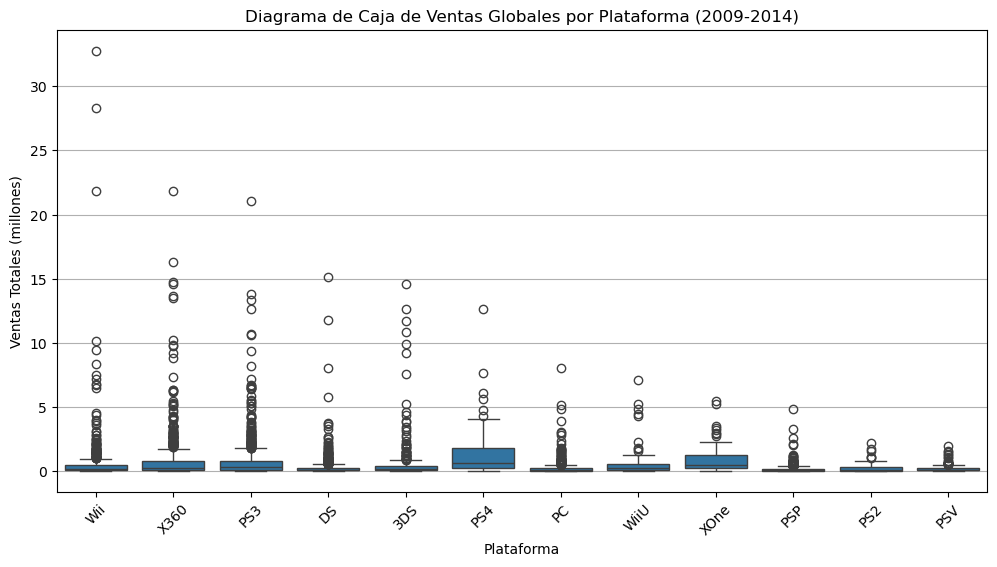

In [25]:
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=df_new)
plt.title('Diagrama de Caja de Ventas Globales por Plataforma (2009-2014)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mejor visibilidad
plt.grid(axis='y')  # Añadir una cuadrícula en el eje y

# Mostrar el gráfico
plt.show()

Datos para la plataforma Wii:
    total_sales  critic_score  user_score
3         32.77          80.0         8.0
8         28.32          87.0         8.4
15        21.80          80.0         7.4
61        10.12          74.0         7.8
68         9.44          74.0         7.3


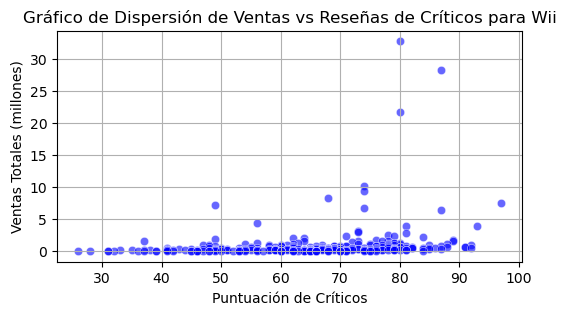

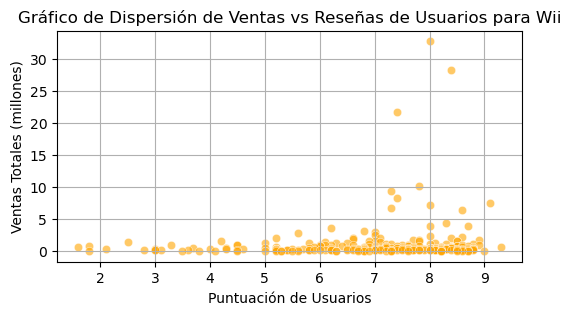

Correlación entre las reseñas de críticos y las ventas: 0.22
Correlación entre las reseñas de usuarios y las ventas: 0.12


In [29]:
platform = 'Wii'
df_platform = df_new[df_new['platform'] == platform]
print(f"Datos para la plataforma {platform}:")
print(df_platform[['total_sales', 'critic_score', 'user_score']].head())
plt.figure(figsize=(6, 3))
sns.scatterplot(data=df_platform, x='critic_score', y='total_sales', color='blue', alpha=0.6)
plt.title(f'Gráfico de Dispersión de Ventas vs Reseñas de Críticos para {platform}')
plt.xlabel('Puntuación de Críticos')
plt.ylabel('Ventas Totales (millones)')
plt.grid()
plt.show()


plt.figure(figsize=(6, 3))
sns.scatterplot(data=df_platform, x='user_score', y='total_sales', color='orange', alpha=0.6)
plt.title(f'Gráfico de Dispersión de Ventas vs Reseñas de Usuarios para {platform}')
plt.xlabel('Puntuación de Usuarios')
plt.ylabel('Ventas Totales (millones)')
plt.grid()
plt.show()
# Calcular la correlación
correlation_critic = df_platform['total_sales'].corr(df_platform['critic_score'])
correlation_user = df_platform['total_sales'].corr(df_platform['user_score'])

print(f"Correlación entre las reseñas de críticos y las ventas: {correlation_critic:.2f}")
print(f"Correlación entre las reseñas de usuarios y las ventas: {correlation_user:.2f}")


### Para ambas correlaciones, al ser cercanas a 0, podemos asumir que no hay unna correlación fuerte de las reseñas con el numero de ventas para el Wii. 

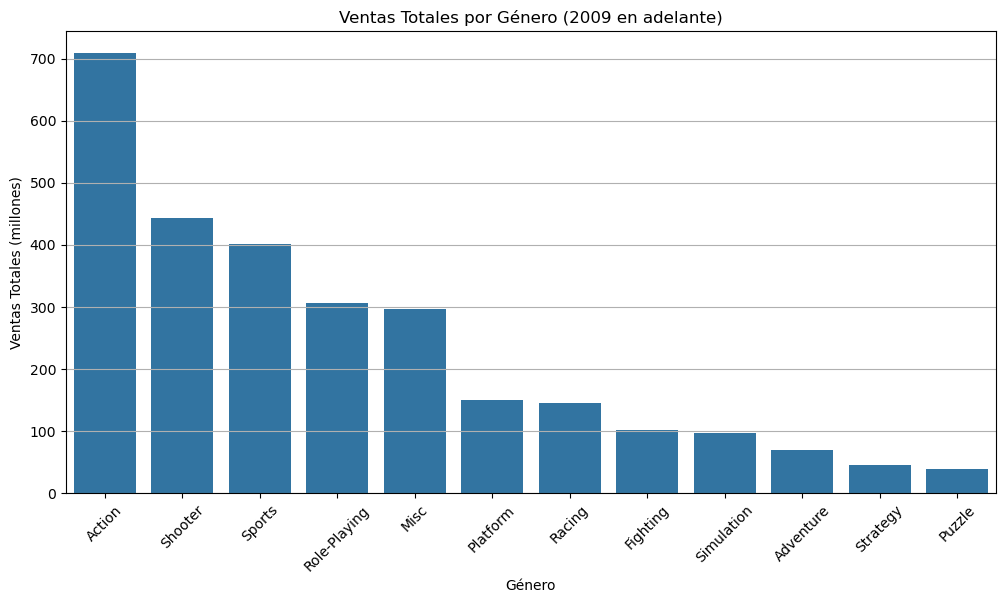

In [31]:
genre_sales = df_new.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Ventas Totales por Género (2009 en adelante)')
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


### Los juegos de Acciòn, Shooter y Sports son los que màs ventas generan. Mientras que Aventura, Estrategia y Puzzle son los que menos. 

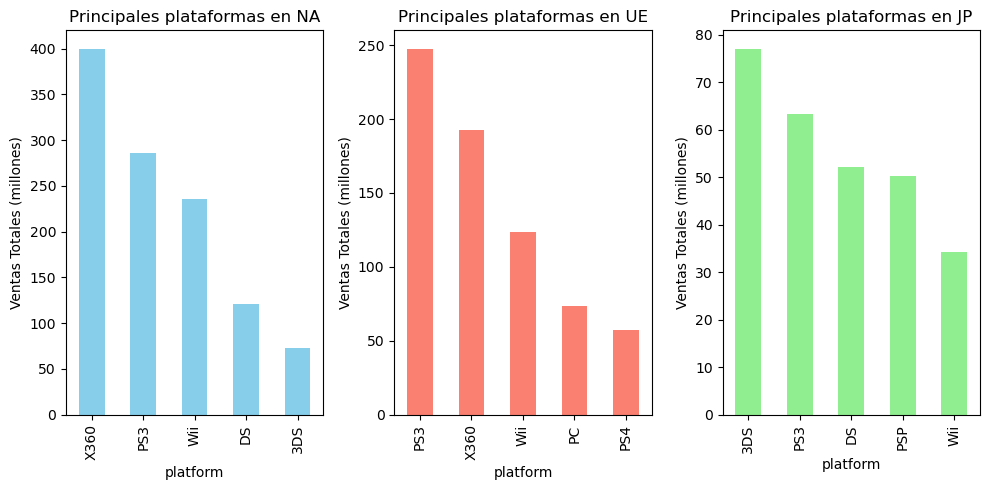

In [40]:
top_platforms_na = df_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='bar', color='skyblue', title='Principales plataformas en NA')
plt.ylabel('Ventas Totales (millones)')

plt.subplot(1, 3, 2)
top_platforms_eu.plot(kind='bar', color='salmon', title='Principales plataformas en UE')
plt.ylabel('Ventas Totales (millones)')

plt.subplot(1, 3, 3)
top_platforms_jp.plot(kind='bar', color='lightgreen', title='Principales plataformas en JP')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()

### Las 3 regiones muestran distribuciones distintas en las ventas por plataforma. La única plataforma que se mantiene en el top 3 en nuestro análisis es el PS3.  

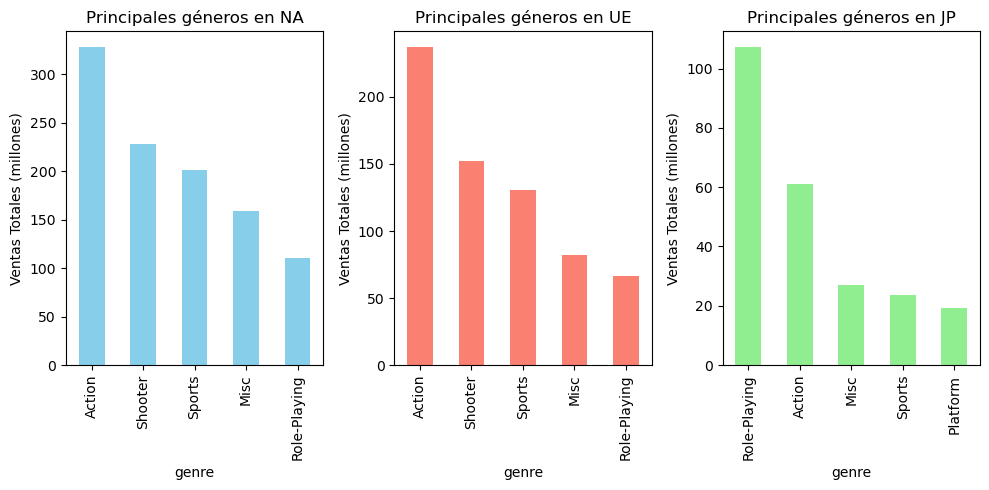

In [39]:
top_genres_na = df_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
top_genres_na.plot(kind='bar', color='skyblue', title='Principales géneros en NA')
plt.ylabel('Ventas Totales (millones)')

plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='bar', color='salmon', title='Principales géneros en UE')
plt.ylabel('Ventas Totales (millones)')

plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='bar', color='lightgreen', title='Principales géneros en JP')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()



### Los juegos del género Action, estàn presentes en el top 3 en las 3 regiones, siendo número 1 en NA y UE, por lo que comparando con el anàlisis previo global, nos demuestra que es el género más popular.
- #### Vale la pena mencionar que la distribución en Europa y Norte América es la misma.

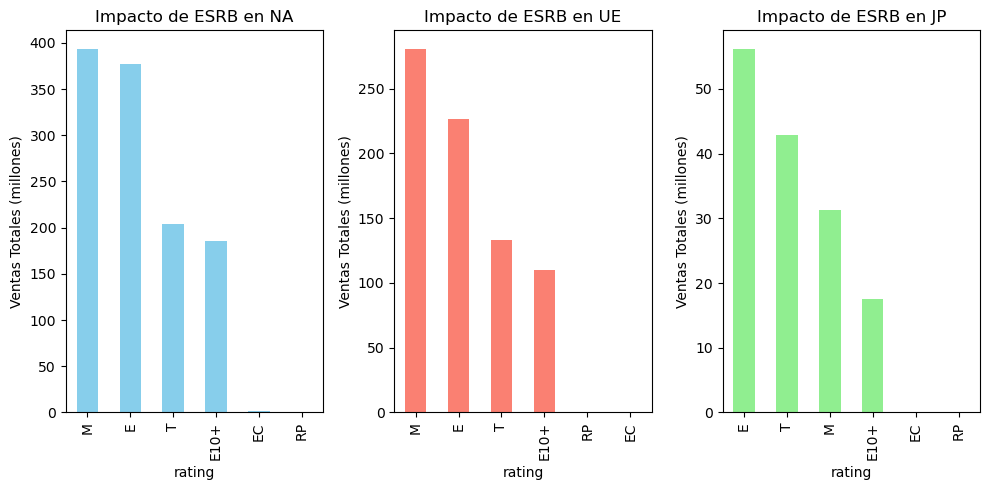

In [42]:
esrb_sales_na = df_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_sales_eu = df_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_sales_jp = df_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
esrb_sales_na.plot(kind='bar', color='skyblue', title='Impacto de ESRB en NA')
plt.ylabel('Ventas Totales (millones)')

plt.subplot(1, 3, 2)
esrb_sales_eu.plot(kind='bar', color='salmon', title='Impacto de ESRB en UE')
plt.ylabel('Ventas Totales (millones)')

plt.subplot(1, 3, 3)
esrb_sales_jp.plot(kind='bar', color='lightgreen', title='Impacto de ESRB en JP')
plt.ylabel('Ventas Totales (millones)')

plt.tight_layout()
plt.show()


### Las calificaciones ESRB sí afectan las ventas de los juegos. 
- ### En  UE y NA, la distribución es la misma, siendo los juegos M los de mayores ventas seguido por los juegos E. 
- ### En JP la disctribuciòn es distinta, done los juegos con mayores vetnas son los de categoría E. 

In [45]:
from scipy import stats
xbox_scores = df[(df['platform'] == 'XOne')]['user_score'].dropna()
pc_scores = df[(df['platform'] == 'PC')]['user_score'].dropna()
action_scores = df[(df['genre'] == 'Action')]['user_score'].dropna()
sports_scores = df[(df['genre'] == 'Sports')]['user_score'].dropna()
alpha = 0.05
t_stat, p_value = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)
print("Prueba de Xbox One vs. PC")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.")
else:
    print("No rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son iguales.")

t_stat, p_value = stats.ttest_ind(action_scores, sports_scores, equal_var=False)  # Asumimos varianzas diferentes

print("\nPrueba de Acción vs. Deportes")
print(f"Estadístico t: {t_stat}")
print(f"Valor p: {p_value}")

if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.")
else:
    print("No rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.")

Prueba de Xbox One vs. PC
Estadístico t: -4.653422798410771
Valor p: 4.935072360183574e-06
Rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para Xbox One y PC son diferentes.

Prueba de Acción vs. Deportes
Estadístico t: 1.57746791633354
Valor p: 0.11483818791498288
No rechazamos la hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.


### Hipótesis para las plataformas Xbox One y PC

- **Hipótesis nula (  H0  )**: La calificación promedio de los usuarios para Xbox One es igual a la de PC.
- **Hipótesis alternativa (  H1  )**: La calificación promedio de los usuarios para Xbox One es diferente de la de PC.

Esta hipótesis nos permite investigar si hay una diferencia significativa en cómo los usuarios perciben los juegos en estas dos plataformas. La hipótesis nula asume que no existe tal diferencia en las calificaciones promedio de los usuarios.

### Hipótesis para los géneros Acción y Deportes

- **Hipótesis nula ( H0  )**: La calificación promedio de los usuarios para el género de Acción es igual a la de Deportes.
- **Hipótesis alternativa (  H1  )**: La calificación promedio de los usuarios para el género de Acción es diferente de la de Deportes.


### Criterio para Probar las Hipótesis

- **Tipo de Prueba**: Utilizamos una prueba t de Student de dos colas para muestras independientes, ya que comparamos dos grupos distintos (Xbox One vs. PC y Acción vs. Deportes) sin suposiciones sobre cuál calificación promedio es mayor.

- **Suposición de Varianzas Diferentes**: Configuramos `equal_var=False` porque no asumimos que las varianzas de las calificaciones de los dos grupos son iguales, dada la posible variación en popularidad y percepción entre plataformas y géneros.

- **Nivel de Significación ( \( \alpha = 0.05 \) )**: Establecimos un umbral de \( \alpha = 0.05 \), aceptando un 5% de probabilidad de error al rechazar la hipótesis nula. Si el valor p es menor que 0.05, rechazaremos la hipótesis nula, concluyendo que existe una diferencia significativa entre las medias.


### Conclusión General

Este proyecto de análisis de datos de videojuegos nos permitió explorar y extraer las tendencias de ventas, la popularidad de las plataformas y géneros, y la influencia de las calificaciones en el rendimiento de los juegos en el mercado.

1. **Tendencias de Ventas en Plataformas y Géneros**: Observamos que las plataformas líderes en ventas varían significativamente entre regiones. Algunas plataformas se destacan en mercados específicos, mientras que otras mantienen una presencia más equilibrada a nivel global. Asimismo, los géneros más populares muestran diferencias regionales notables, lo que sugiere una diversidad en las preferencias de los usuarios según la ubicación.

2. **Preferencias Regionales y Clasificación ESRB**: En cada región, los géneros y plataformas más vendidos muestran variaciones significativas. Además, notamos que la clasificación ESRB afecta las ventas de manera distinta en cada región, lo cual podría deberse a diferencias culturales en la percepción de los juegos según su nivel de contenido.

3. **Diferencias Estadísticas en Calificaciones**: Las pruebas de hipótesis realizadas entre las plataformas Xbox One y PC, así como entre los géneros de Acción y Deportes, indicaron si las calificaciones promedio de los usuarios difieren significativamente. Estos resultados arrojan luz sobre las variaciones en la satisfacción de los usuarios en distintas plataformas y géneros.

### Reflexiones Finales

Este análisis proporciona una visión detallada de las dinámicas del mercado de videojuegos, destacando la importancia de la segmentación del mercado y del entendimiento de las preferencias regionales y demográficas. Estos hallazgos pueden orientar a desarrolladores y distribuidores en la planificación de estrategias de lanzamiento y en la adaptación de productos a las expectativas de los jugadores de cada región.

